<a href="https://colab.research.google.com/github/nikitaanand12/MACHINE_LEARNING_LAB/blob/main/CT_33_Convolutional_Neural_Networks_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Convolutional Neural Network

###  Importing packages

In [7]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

In [8]:
from tensorflow.keras.utils import to_categorical

### Preparing Dataset

In [9]:
batch_size = 64
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
y_train = to_categorical(y_train, num_classes)
y_test =to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Building a Model

In [12]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))  #that % of neuron is dropped out
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 16)          0         
                                                                 
 flatten_2 (Flatten)         (None, 400)              

### Model Training

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 22s 23ms/step - loss: 2.3856 - accuracy: 0.1049 - val_loss: 2.3185 - val_accuracy: 0.1323
Epoch 2/50
938/938 [==============================] - 21s 22ms/step - loss: 2.3625 - accuracy: 0.1100 - val_loss: 2.3031 - val_accuracy: 0.1483
Epoch 3/50
938/938 [==============================] - 21s 22ms/step - loss: 2.3442 - accuracy: 0.1170 - val_loss: 2.2899 - val_accuracy: 0.1670
Epoch 4/50
938/938 [==============================] - 21s 22ms/step - loss: 2.3267 - accuracy: 0.1237 - val_loss: 2.2785 - val_accuracy: 0.1842
Epoch 5/50
938/938 [==============================] - 22s 23ms/step - loss: 2.3157 - accuracy: 0.1283 - val_loss: 2.2683 - val_accuracy: 0.2046
Epoch 6/50
938/938 [==============================] - 21s 22ms/step - loss: 2.3016 - accuracy: 0.1379 - val_loss: 2.2590 - val_accuracy: 0.2276
Epoch 7/50
938/938 [==============================] - 22s 23ms/step - loss: 2.2893 - accuracy: 0.1436 - val_loss: 2.2502 - val_accuracy:

### Testing

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5115034580230713
Test accuracy: 0.7134000062942505


### Prediction

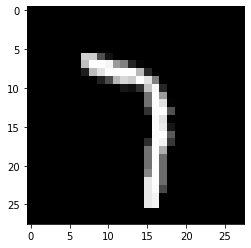

In [15]:
import pylab as plt

plt.imshow(x_test[122].reshape(28,28),cmap='gray')
plt.show()

In [16]:
import numpy as np
li=[0.5, 0,0.4, 0,0,0]
li=np.array(li)
thresholded = (li>=0.5)*1
thresholded 

array([1, 0, 0, 0, 0, 0])

In [17]:
import numpy as np
prediction = model.predict(x_test[122:123])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1])

Prediction Score:
 [0.06036067 0.0867679  0.14657746 0.11825177 0.03288964 0.07907161
 0.05730151 0.19088805 0.0940327  0.1338587 ]

Thresholded Score:
 [0 0 0 0 0 0 0 0 0 0]

Predicted Digit:
 []


# Part 2: Applications of Convolutional Neural Network

###  MobileNet Models

In [ ]:
model = MobileNet(input_shape=None, alpha=0.25, depth_multiplier=1, dropout=1e-3, 
                                 include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

model.summary()

2121728/2108140 [==============================] - 0s 0us/step
Model: "mobilenet_0.25_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 8)       216       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 8)      32        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 8)       0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)      72        
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 8)  

###  Classify images

In [ ]:
# Write the image name below

img_path = '.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:\n', decode_predictions(preds))

###  Extract CNN features

In [ ]:
features = model.predict(x)
print('\nFeature Shape:\n',features.shape)
print('\nFeatures:\n',features)

###  Extract features from an arbitrary intermediate layer

In [ ]:
model_minimal = Model(input=model.input, output=model.get_layer('conv_dw_2_relu').output)

conv_dw_2_relu_features = model_minimal.predict(x)
print('Features of conv_dw_2_relu:',conv_dw_2_relu_features.shape)

### You can extract these features and use the base network as a feature extractor for your problems. 

# Part 3: Deep Convolution Layer Visualization

In [ ]:
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math

### Extract Data

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

### Model Building

In [ ]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")

x_image = tf.reshape(x,[-1,28,28,1])
hidden_1 = slim.conv2d(x_image,5,[5,5])
pool_1 = slim.max_pool2d(hidden_1,[2,2])
hidden_2 = slim.conv2d(pool_1,5,[5,5])
pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(pool_2,20,[5,5])
hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(slim.flatten(hidden_3),10,activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

### Training

In [ ]:
batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))

### Testing accuracy

In [ ]:
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:mnist.test.labels, keep_prob:1.0})
print("test accuracy %g"%(testAccuracy))

### Get activation values and plotting

In [ ]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)
    
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

### Input Image

In [ ]:
imageToUse = mnist.test.images[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

### Activation in Layer 1

In [ ]:
getActivations(hidden_1,imageToUse)

### Activation in Layer 2

In [ ]:
getActivations(hidden_2,imageToUse)

### Activation in Layer 3

In [ ]:
getActivations(hidden_3,imageToUse)

# Part 4: Design Choices in Convolutional Neural Networks

## Influence of convolution size

### Model with (3 x 3) Convolution

In [ ]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

### Model with (7 x 7) Convolution

In [ ]:
# Write your code here 

# Use the same model design from the above cell 

## Striding

### Model with (7 x 7) Convolution with 2 Steps

In [ ]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), strides=2, activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

## Padding

### Model with (7 x 7) Convolution with Same Padding

In [ ]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), strides=1, padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), strides=1, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

## Pooling

### Model with (3 x 3) Convolution with Pooling (2 x 2) 

In [ ]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

### Model with (3 x 3) Convolution with Pooling (3 x 3) 

In [ ]:
# Write your code here 

# Use the same model design from the above cell 

### What are your findings?